In [1]:
%load_ext autoreload
%autoreload 2

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
import sklearn

from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

from collections import Counter

In [3]:
data_path = r"Data/amazon-fine-food-reviews/Reviews.csv"

In [4]:
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

## Load Data

In [28]:
data = pd.read_csv(data_path)
data["Summary"].fillna("", inplace=True)
data["Text"].fillna("", inplace=True)

## Data Exploration

In [6]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
#Score is unbalanced
#More than 50% has 5 starts
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


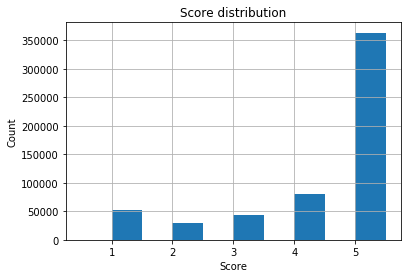

In [8]:
plt.hist(data["Score"], [0.5*i for i in range(1, 12)])
plt.title("Score distribution")
plt.ylabel("Count")
plt.xlabel("Score")
plt.grid(True)
plt.show()

In [30]:
t = Tokenizer()

t.fit_on_texts(data["Text"])
t.fit_on_texts(data["Summary"])

In [37]:
#Types count
types = len(t.word_counts)
#Tokens count
tokens = sum(t.word_counts.values())
print("Types:", types)
print("Tokens:",tokens)
print("Types/Tokens:", types/tokens)

top50 = Counter(t.word_counts).most_common(50)
for i,w in enumerate(top50):
    print(i+1,":", w[1], "\t-", w[0])
    
#In the most common words
#-Common words in English (the, I, and, ...)
#-Preferences (like, good, great, ...)
#-Food bias (database on revies about food)

Types: 139510
Tokens: 48795748
Types/Tokens: 0.0028590605886398136
1 : 1928057 	- the
2 : 1529631 	- i
3 : 1325111 	- and
4 : 1276799 	- a
5 : 1036737 	- to
6 : 960720 	- it
7 : 822664 	- of
8 : 753208 	- is
9 : 699261 	- this
10 : 647090 	- br
11 : 593065 	- for
12 : 562221 	- in
13 : 493082 	- my
14 : 436769 	- that
15 : 401648 	- but
16 : 368806 	- not
17 : 363328 	- with
18 : 350294 	- have
19 : 344135 	- you
20 : 326695 	- are
21 : 319108 	- was
22 : 292600 	- they
23 : 289587 	- as
24 : 280536 	- on
25 : 269597 	- like
26 : 265298 	- so
27 : 252448 	- good
28 : 247304 	- these
29 : 240259 	- great
30 : 218176 	- them
31 : 193875 	- be
32 : 191103 	- coffee
33 : 190605 	- taste
34 : 187410 	- product
35 : 185910 	- at
36 : 184839 	- or
37 : 183578 	- very
38 : 181537 	- one
39 : 180055 	- just
40 : 174561 	- if
41 : 165204 	- all
42 : 161549 	- flavor
43 : 159491 	- tea
44 : 155033 	- love
45 : 150374 	- from
46 : 144075 	- it's
47 : 141572 	- food
48 : 140082 	- more
49 : 139753 

In [9]:
reviews = pd.DataFrame(data[["Summary", "Text", "Score"]])